In [5]:
using MAT 
using GeoStats
using DataFrames
using Plots; gr();
using Random
using Distances

In [6]:
ign = matread("../resources/igncn1.mat");

In [7]:
n = 1000
filter = .! isnan.(ign["Latitude"])
idx = sample(1:sum(filter), n)
d = DataFrame(hcat(ign["SiO2"][filter], 
        ign["Latitude"][filter] .+ (randn(sum(filter)) .* .1/100), # avoid varg errors for identical coords
        ign["Longitude"][filter] .+ (randn(sum(filter)) .* .1/100)), 
    ["SiO2", "Latitude", "Longitude"])
# d = DataFrame(hcat(ign["SiO2"][filter][idx], 
#         (ign["Latitude"][filter][idx] .+ 90 .+ (randn(n).*.1/100)), # avoid varg errors for identical coords
#         (ign["Longitude"][filter][idx] .+ 180 .+ (randn(n).*.1/100))), 
#     ["SiO2", "Latitude", "Longitude"])

# In degrees 
# d = DataFrame(hcat(ign["SiO2"][filter][idx], 
#         (ign["Latitude"][filter][idx] .+ (randn(n).*.1/100)), # avoid varg errors for identical coords
#         (ign["Longitude"][filter][idx] .+ (randn(n).*.1/100))), 
#     ["SiO2", "Latitude", "Longitude"])
dgeo = georef(d, (:Latitude,:Longitude))

68042 MeshData{2,Float64}
  variables (rank 0)
    └─SiO2 (Float64)
  domain: 68042 PointSet{2,Float64}

In [8]:
varg = EmpiricalVariogram(dgeo, :SiO2, distance=Haversine(6371), maxlag=200, algo=:ball)
#varg = EmpiricalVariogram(dgeo, :SiO2, maxlag=5)

┌ Warning: :ball algorithm requires Minkowski metric
└ @ Variography /Users/f0043n9/.julia/packages/Variography/Z5IJt/src/empirical.jl:76


EmpiricalVariogram
  abscissa: (2.9919209804482145, 194.96518404697952)
  ordinate: (43.965054738859145, 97.56489144826605)
  N° pairs: 32329133

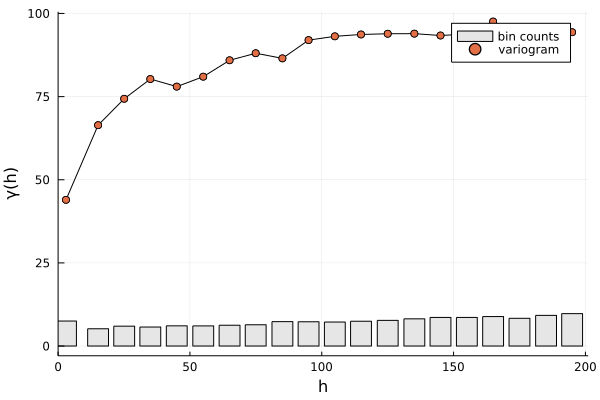

In [9]:
plot(varg)

(:abscissa, :ordinate, :counts, :distance)


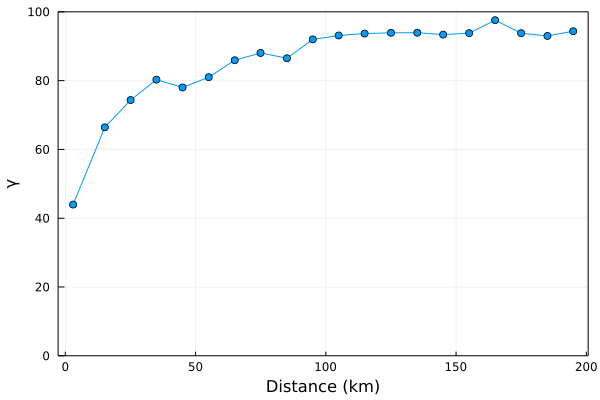

In [10]:
println(fieldnames(typeof(varg)))

plot(varg.abscissa, varg.ordinate, marker=true, legend=false, 
    ylabel="γ", xlabel="Distance (km)", framestyle=:box, ylims=(0,100))
#savefig("viz/sample_correlation.png")

In [11]:
include("../src/utilities.jl")

areaAverage

In [12]:
blat, blong, bval = areaAverage(ign["Latitude"][:], ign["Longitude"][:], ign["SiO2"][:]);
d = DataFrame(hcat(bval, 
        blat .+ randn(length(blat)).* .1/100, 
        blong.+ randn(length(blat)).* .1/100), 
    ["SiO2", "Latitude", "Longitude"])
dgeo_avg = georef(d, (:Latitude,:Longitude))

2772 MeshData{2,Float64}
  variables (rank 0)
    └─SiO2 (Float64)
  domain: 2772 PointSet{2,Float64}

In [13]:
varg_avg = EmpiricalVariogram(dgeo_avg, :SiO2, distance=Haversine(6371), 
    maxlag=1500, algo=:ball)

┌ Warning: :ball algorithm requires Minkowski metric
└ @ Variography /Users/f0043n9/.julia/packages/Variography/Z5IJt/src/empirical.jl:76


EmpiricalVariogram
  abscissa: (39.87997522777278, 1459.410940005452)
  ordinate: (47.197641603582845, 64.6299740299035)
  N° pairs: 219703

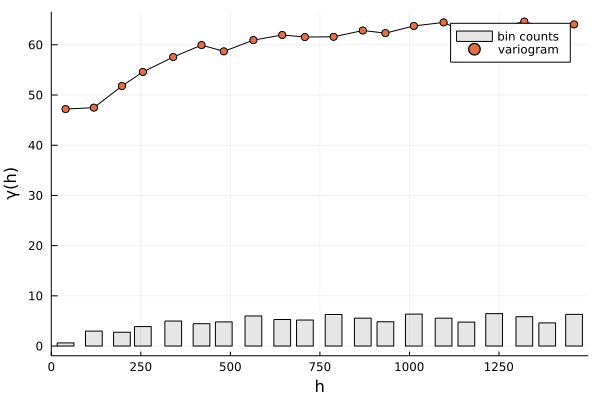

In [14]:
plot(varg_avg)

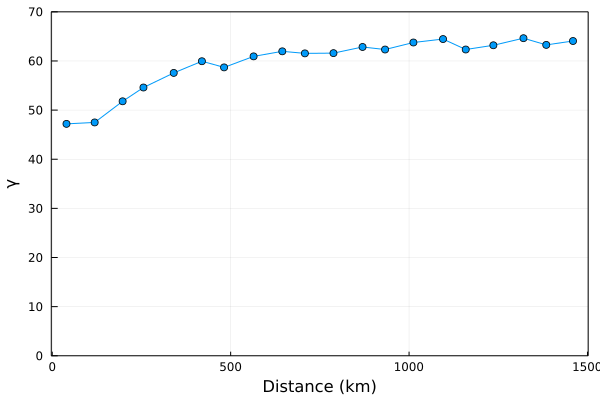

In [15]:
plot(varg_avg.abscissa, varg_avg.ordinate, marker=true, legend=false, 
    ylabel="γ", xlabel="Distance (km)", framestyle=:box, ylims=(0,70))
#savefig("viz/area_avg_correlation.png")

In [18]:
# Fit variogram 
f = fit(SphericalVariogram, varg_avg)

SphericalVariogram{Float64, Haversine{Int64}}
  range: Float64 769.4934269112642
  sill: Float64 63.12982578348689
  nugget: Float64 45.23137985885459
  distance: Haversine{Int64}


In [19]:
149000000/(f.range*f.range)

251.63812447727375

## How many samples have age data? How many have minor element data? 